In [64]:
# Импортируем необходимые библиотеки
import math
from sympy import simplify, symbols, Eq, sympify, solveset, solve, Float
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display as d

In [65]:

# # Исходные данные
# # Параметры задачи (вариант 5)
h0 = 4.4 # Высота жидкости в компенсационной емкости
h1 = 0.2 # Постоянная высота жидкости в рабочей емкости
S = 0.4 # Площадь сечения рабочей емкости (зеркала жидкости)
G = 3400 # Массовый расход ткани, г/с
m1 = 0.12 # Уровень влажности ткани до окраски
m2 = 1.0 # Уровень влажности ткани после окраски
ρ = 500 # Плотность ткани, кг/м3
tп = 15 # Время переходного процесса, с

g = 9.8 # Ускорение свободного падения, м/с2

φ_max = 14 # Угол вращения вала исполнительного двигателя, 
           #соответствующий перемещению клапана f1 от 0..fmax
f_max = 3 # Максимальное проходное сечения проходного клапана f1

ε = 0.6 # Коэффициент расхода жидкости через клапан
t_п = 15 # Время переходного процесса объекта управления, с
m = 3 # 3..4 # Масса сильфона, кг (?)
k_дин = 1.5 # 1.5..2.5 
M_ст = 1.5 # 1.5..3.0

In [66]:
# Функция для округления чисел в выражении sympy
def r(expression, decimal_places=2):
    def round_numbers(expr, decimal_places):
        if expr.is_Float:
            return Float(round(expr, decimal_places))
        elif expr.is_Number:
            return expr
        elif expr.args:
            args = [round_numbers(arg, decimal_places) for arg in expr.args]
            return expr.func(*args)
        else:
            return expr
    # Convert the expression to a SymPy expression
    expr = sympify(expression)

    # Round the floating-point numbers in the expression
    rounded_expr = round_numbers(expr, decimal_places)

    return rounded_expr

In [67]:
# Проходное сечение клапана в номинальном режиме
# f1 = ((G * math.pow(10, -3) * (m1 - m2))) / (ε * math.sqrt(2 * g) * (h0 - h1)) # * 10^-3 м2/с
f1 = (1 / (ρ*ε)) * (abs(G - (m2 - m1)) 
                    / 
                    (math.sqrt(2 * g) * (h0 - h1))) # * math.pow(10, -2) m2
# f1 = f1 * pow(10, -2)

# Постоянная времени объекта управления, с
T_о = ((2*S) * math.sqrt(h0 - h1)) / (f1 * ε * math.sqrt(2 * g))  # +
# Коэффициент передачи объекта управления
k_о = (2 * (h0 - h1)) / f1 # * 10^-3
# Максимальная величина проходного сечения рег. клапана
f1_max = 4 * f1
# Коэффициент передачи регулирующего графика
k_ро = f1_max / φ_max # м3/с
print(f'{f1=}*10^-2 {T_о=}\n{k_о=} {f1_max=} {k_ро=}')


f1=0.6093515442308131*10^-2 T_о=1.0129020032721485
k_о=13.785145995819793 f1_max=2.4374061769232522 k_ро=0.17410044120880372


In [68]:
## Рассчитываем мощность двигателя
# Скорость вращения регулирующего органа
n_ро = ((0.2 * φ_max) / t_п) * 60 # об/мин
# Мощность двигателя
k_дин = 1.5
P = (k_дин * (M_ст) * (n_ро)) / 0.975 # ~ 27.7 Вт

print(f'{n_ро=} {P=}')

n_ро=11.200000000000001 P=25.84615384615385


In [69]:
## Выбираем двигатель СЛ-367
U = 110
P = 32
n_дв = 2500
I = 0.07
# Параметры обмотки якоря
R_я = 1.5
I_я = 0.9

print(f'{n_дв=:.3f}')

n_дв=2500.000


In [70]:
# Постоянная двигателя
C_дв = (U - I*R_я) / (n_дв * (2*math.pi/60))
# Постоянная времени двигателя
T_м = (I * R_я) / (C_дв * C_дв)
# Коэффициент двигателя
k_дв = 1 / C_дв
Wдв_p = k_дв / (T_м * ρ + 1) * ρ
# Коэффициент редуктора
k_р = n_ро / n_дв
C = 1000 # Н/м # Уточнить значение
k_d = (ρ * g * S * pow(10, -2)) / C
# Постоянная вращения
T_k = math.sqrt(m / (2 * C))
T_d = 2 * S * T_k
# Сравнивающее устровйство
k_тс = 10
# Магнитное усиление
k_му = 100; T_му = 1
# Регулирующий орган
q_потр = f_max * ε * math.sqrt((2 * g) * (h0 - h1)) # м3/с, объемный секундный расход жидкости из емкости


print(f'{T_м=} {k_р=} {k_d=} {T_k=}\n{T_d=} {k_тс=} {k_му=} {k_му=}')

T_м=0.5958962956308599 k_р=0.0044800000000000005 k_d=0.019600000000000003 T_k=0.03872983346207417
T_d=0.030983866769659335 k_тс=10 k_му=100 k_му=100


### Для удобства выводим все необходимые нам значения в округлённом виде

In [71]:

print(f'{k_о=:.2f}\t{k_ро=:.2f}\t{k_дин=:.3f}\n{k_р=:.2f}\t{k_d=:.3f}\t{k_тс=:.2f}\t{k_дв=:.2f} \n')
print(f'{T_о=:.2f}\t{T_м=:.2f}\t{T_k=:.2f}\t{T_d=:.2f}\t{T_му=:.2f}')


k_о=13.79	k_ро=0.17	k_дин=1.500
k_р=0.00	k_d=0.020	k_тс=10.00	k_дв=2.38 

T_о=1.01	T_м=0.60	T_k=0.04	T_d=0.03	T_му=1.00


## Уравнение системы (стр. 30)

Подставляем полученные переменные согласно формулам:

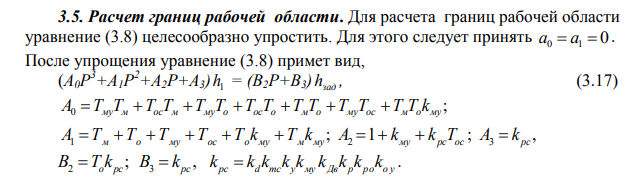

, где:

k_рс = k_о * k_d * k_дв * k_р * k_ро * k_тс * k_у * k_му

k_рс = γ * _k_у_ * _k_му_

Соотвенно A0, A1, A2, A3 будут выражены в следующем виде:

In [72]:
# Определение символьных переменных
T_ос, k_му, k_у = symbols('T_ос k_му k_у')

k_рс = k_о * k_d * k_дв * k_р * k_ро * k_тс * k_у * k_му # Коэффициент передачи разомкнутой системы

# Выражение для A0
A0 = T_му*T_м + T_ос*T_м + T_му*T_о + T_ос*T_о + T_м*T_о + T_му*T_ос + T_м*T_о*k_му
A1 = T_м + T_о + T_му + T_ос + T_о*k_му + T_м*k_му
A2 = 1.0 + k_му + k_рс*T_ос
A3 = k_рс
B2 = T_о*k_рс
B3 = k_рс

# Упрощение выражения A0
A0 = simplify(A0)
A1 = simplify(A1)
A2 = simplify(A2)
A3 = simplify(A3)

d(Eq(symbols('k_рс'), r(k_рс)))
d(Eq(symbols('A0'), r(A0)))
d(Eq(symbols('A1'), r(A1)))
d(Eq(symbols('A2'), r(A2)))
d(Eq(symbols('A3'), r(A3)))


Eq(k_рс, 0.01*k_му*k_у)

Eq(A0, 2.61*T_ос + 0.6*k_му + 2.21)

Eq(A1, T_ос + 1.61*k_му + 2.61)

Eq(A2, 0.01*T_ос*k_му*k_у + k_му + 1.0)

Eq(A3, 0.01*k_му*k_у)

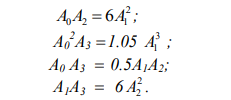

Приводим уравнения к функциям для рассчёта коэффициентов
стр. 30

Пусть коэффиент усиления магнитного усилителя k_му = 100

In [73]:
k_му_value = 100

# Присваиваем значение k_му в уравнениях
A0 = A0.subs(k_му, k_му_value)
A1 = A1.subs(k_му, k_му_value)
A2 = A2.subs(k_му, k_му_value)
A3 = A3.subs(k_му, k_му_value)

eq1 = simplify(Eq(A0 * A2, 6 * A1**2))
eq2 = simplify(Eq(A0**2 * A3, 1.05 * A1**3))
eq3 = simplify(Eq(A0 * A3, 0.5 * A1 * A2))
eq4 = simplify(Eq(A1 * A3, 6 * A2))

d(r(eq1))
d(r(eq2))
d(r(eq3))
d(r(eq4))


Eq(160371.19*(0.01*T_ос + 1)**2, (2.61*T_ос + 62.57)*(0.5*T_ос*k_у + 101.0))

Eq(4588301.5*(0.01*T_ос + 1)**3, 1965.53*k_у*(0.04*T_ос + 1)**2)

Eq(k_у*(1.31*T_ос + 31.41), (0.5*T_ос + 81.74)*(0.5*T_ос*k_у + 101.0))

Eq(0.5*k_у*(T_ос + 163.49), 3.01*T_ос*k_у + 606.0)

Получаем уравнения функций для k_y1, k_y2, k_y3, k_y4

In [74]:
# Получаем уравнения функций для каждого из коэффициентов
k_у1 = simplify(solveset(eq1, k_у))
k_у2 = simplify(solveset(eq2, k_у))
k_у3 = simplify(solveset(eq3, k_у))
k_у4 = simplify(solveset(eq4, k_у))

d(r(k_у1))
d(r(k_у2))
d(r(k_у3))
d(r(k_у4))


{(11.95*T_ос**2 + 3382.97*T_ос + 306852.74)/(T_ос*(2.61*T_ос + 62.57))}

{2334.38*(0.01*T_ос + 1)**3/(0.04*T_ос + 1)**2}

{(-1.27*T_ос - 207.81)/(0.01*T_ос**2 + 1.0*T_ос - 0.79)}

{-7.38/(0.03*T_ос - 1.0)}

Строим графики для кажного коэффициента

In [75]:
# Функция для извлечения значения из выражения
# Задаём диапазон значений для T_ос
start_value = 0.1
end_value = 17


In [76]:
T_ос_values = np.linspace(start_value, end_value, 20)

def f(expr, sym, val):
    result = expr.subs(sym, val)
    return float(list(result)[0])

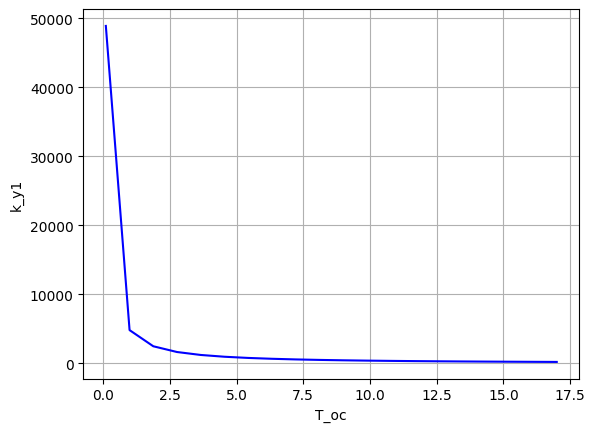

In [77]:
# Строим график k_у1
k_y1_values = [f(k_у1, T_ос, T_ос_value) for T_ос_value in T_ос_values]

plt.plot(T_ос_values, k_y1_values, color='blue', label='k_у1')
plt.xlabel('T_ос')
plt.ylabel('k_у1')
plt.grid(True)
plt.show()

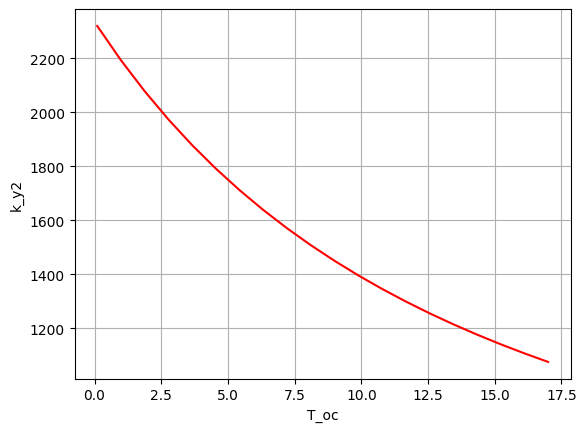

In [78]:
# Строим график k_у2
k_y2_values = [f(k_у2, T_ос, T_ос_value) for T_ос_value in T_ос_values]

plt.plot(T_ос_values, k_y2_values, color='red', label='k_у2')
plt.xlabel('T_ос')
plt.ylabel('k_у2')
plt.grid(True)
plt.show()

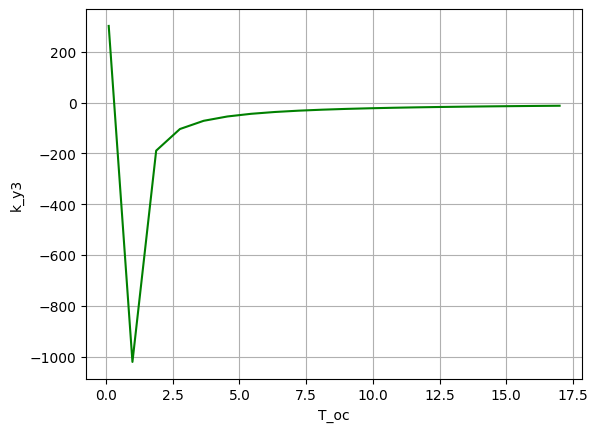

In [79]:
# Строим график k_у3
k_y3_values = [f(k_у3, T_ос, T_ос_value) for T_ос_value in T_ос_values]

plt.plot(T_ос_values, k_y3_values, color='green', label='k_у3')
plt.xlabel('T_ос')
plt.ylabel('k_у3')
plt.grid(True)
plt.show()

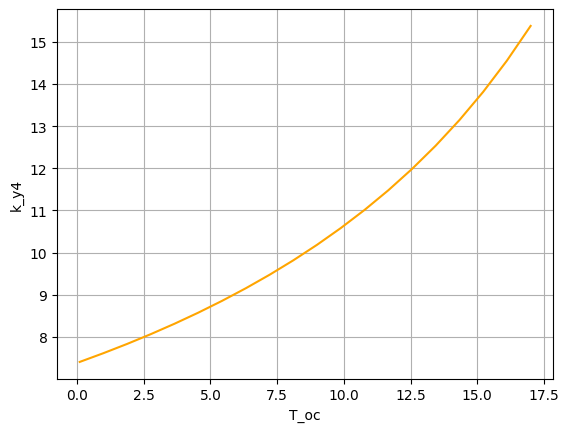

In [80]:
# Строим график k_у4
k_y4_values = [f(k_у4, T_ос, T_ос_value) for T_ос_value in T_ос_values]

plt.plot(T_ос_values, k_y4_values, color='orange', label='k_у4')
plt.xlabel('T_ос')
plt.ylabel('k_у4')
plt.grid(True)
plt.show()

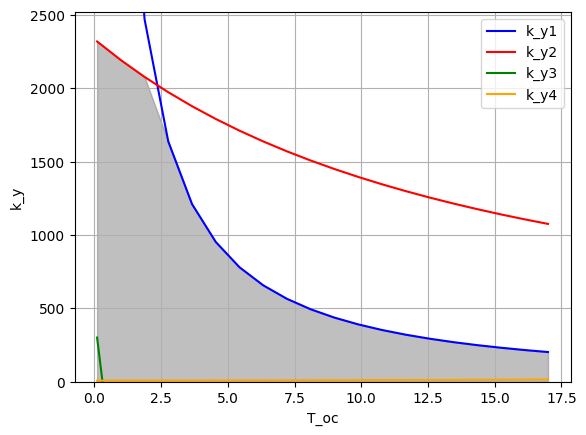

In [81]:
# Построим все графики на одном полотне чтобы получить представление о рабочей области
k_y1_values = [f(k_у1, T_ос, T_ос_value) for T_ос_value in T_ос_values]
k_y2_values = [f(k_у2, T_ос, T_ос_value) for T_ос_value in T_ос_values]
k_y3_values = [f(k_у3, T_ос, T_ос_value) for T_ос_value in T_ос_values]
k_y4_values = [f(k_у4, T_ос, T_ос_value) for T_ос_value in T_ос_values]
# В качестве лимита по оси Y выберем максимальное значение k_у2
y_limit = max(k_y2_values)
plt.ylim(0, y_limit+200)
plt.plot(T_ос_values, k_y1_values, label='k_у1', color='blue')
plt.plot(T_ос_values, k_y2_values, label='k_у2', color='red')

# Штрихуем рабочую область
max_k_y = np.minimum(k_y1_values, k_y2_values)
plt.fill_between(T_ос_values, 0, max_k_y, color='gray', alpha=0.5)

plt.plot(T_ос_values, k_y3_values, label='k_у3', color='green')
plt.plot(T_ос_values, k_y4_values, label='k_у4', color='orange')
# Добавим описание для каждого графика
plt.legend()
plt.xlabel('T_ос')
plt.ylabel('k_у')
plt.grid(True)
plt.show()

## Расчёт времени переходного процесса

$$ t~п = 3 * (A2 / A3) $$

In [82]:
# Выбираем значение k_у
k_у_value = 20

def f_T_ос(k_у_value, a2=A2, a3=A3):
    # Подставляем значение k_у в уравнения A2 и A3
    a2 = a2.subs(k_у, k_у_value)
    a3 = a3.subs(k_у, k_у_value)
    # Находим T_ос из уравнения переходного процесса
    
    _t_п = (3 * (a2 / a3))
    
    result = solve(_t_п, T_ос)
    return abs(float(list(result)[0]))

r(f_T_ос(k_у_value))

10.06

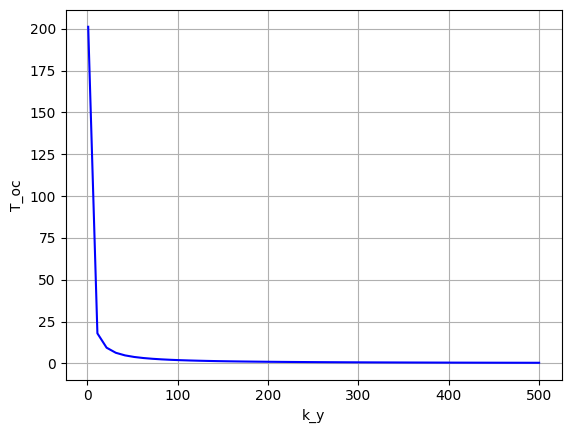

In [83]:
# Строим график зависимости T_ос от k_у
k_у_values = np.linspace(1, 500, 50)

T_ос_values = [f_T_ос(k_у_value) for k_у_value in k_у_values]

plt.plot(k_у_values, T_ос_values, color='blue', label='T_ос')
plt.xlabel('k_у')
plt.ylabel('T_ос')
plt.grid(True)
plt.show()